##**Smart Traffic Violation Pattern Detector Project**
This project analyzes traffic violation data using Python, NumPy, Pandas, Matplotlib, and Seaborn to identify trends, hotspots, and behavioral patterns in traffic violations.

#Step 1 — Import Required Libraries

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Step 2 — Load the CSV Data

In [ ]:
#Loading and exploring the dataset
df=pd.read_csv('/content/Indian_Traffic_Violations.csv')
df.head() #showing first five rows.

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,...,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,...,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,...,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,...,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,...,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [ ]:
df.tail() #showing last five rows.

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
3995,VLT103995,Signal Jumping,2180,Maharashtra,2033-12-09,04:18,Car,White,2000,Gujarat,...,100,90,0.15,Positive,Yes,No,Not Paid,Yes,2,NaN
3996,VLT103996,Using Mobile Phone,2708,Karnataka,2033-12-10,08:21,Scooter,Black,2018,Delhi,...,100,90,0.21,Negative,Yes,No,Card,No,4,First Violation
3997,VLT103997,Signal Jumping,3163,Delhi,2033-12-11,09:36,Bike,Yellow,1996,West Bengal,...,60,54,0.28,Negative,Yes,No,Online,No,2,First Violation
3998,VLT103998,No Seatbelt,1691,Gujarat,2033-12-12,02:46,Car,Black,1995,Delhi,...,30,77,0.28,Positive,No,Yes,Cash,No,2,NaN
3999,VLT103999,No Helmet,2133,Delhi,2033-12-13,09:14,Truck,Red,2010,Delhi,...,50,105,0.34,Not Conducted,No,No,Card,Yes,4,NaN


##Step 3 — Understand Dataset Structure

In [ ]:
df.info() #shows column names, data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_ID               4000 non-null   object 
 1   Violation_Type             4000 non-null   object 
 2   Fine_Amount                4000 non-null   int64  
 3   Location                   4000 non-null   object 
 4   Date                       4000 non-null   object 
 5   Time                       4000 non-null   object 
 6   Vehicle_Type               4000 non-null   object 
 7   Vehicle_Color              4000 non-null   object 
 8   Vehicle_Model_Year         4000 non-null   int64  
 9   Registration_State         4000 non-null   object 
 10  Driver_Age                 4000 non-null   int64  
 11  Driver_Gender              4000 non-null   object 
 12  License_Type               4000 non-null   object 
 13  Penalty_Points             4000 non-null   int64

In [ ]:
df.describe() #shows summary statistics of numerical columns

,Fine_Amount,Vehicle_Model_Year,Driver_Age,Penalty_Points,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,2008.910500,46.658000,4.960500,3.00050,59.817500,69.479000,0.251408,2.47750
std,1417.415712,8.333208,16.865858,3.157441,1.41085,23.633267,29.394652,0.143744,1.71398
min,100.000000,1995.000000,18.000000,0.000000,1.00000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,2002.000000,32.000000,2.000000,2.00000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,2009.000000,47.000000,5.000000,3.00000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,2016.000000,61.000000,8.000000,4.00000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,2023.000000,75.000000,10.000000,5.00000,100.000000,120.000000,0.500000,5.00000


In [ ]:
df.isnull().sum() #shows count of missing (null) values.

,0
Violation_ID,0
Violation_Type,0
Fine_Amount,0
Location,0
Date,0
Time,0
Vehicle_Type,0
Vehicle_Color,0
Vehicle_Model_Year,0
Registration_State,0


In [ ]:
#very important to check missing & Duplicate data: missing values can cause incorrect calculations or error in data models because the dataset become incomplete.
#Similarly, duplicate data can make results biased like counting the same person or transaction twice.
#This gives misleading insights and affects the accuracy of our analysis or ML model.

df.duplicated().sum() #shows count of duplicate rows.

np.int64(0)

In [ ]:
df.shape #shows number of rows and columns.

(4000, 33)

In [ ]:
df.dtypes #shows data types of each column.

,0
Violation_ID,object
Violation_Type,object
Fine_Amount,int64
Location,object
Date,object
Time,object
Vehicle_Type,object
Vehicle_Color,object
Vehicle_Model_Year,int64
Registration_State,object


##Step 4 — Data Cleaning and Preprocessing

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (example: fill NAs or drop rows)
df.dropna(subset=['Date', 'Time'], inplace=True)

# Convert date and time columns if available
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

# Extract useful time-based features
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Hour'] = pd.to_datetime(df['Date']).dt.hour

print("Data cleaned and new columns added!")
df.head()


Data cleaned and new columns added!


,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments,Day,Month,Hour
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02:00,Car,Red,2012,West Bengal,...,Negative,Yes,No,Online,Yes,3,Repeat Offender,Sunday,January,0
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42:00,Scooter,Silver,2010,Tamil Nadu,...,Negative,Yes,Yes,Online,No,2,Repeat Offender,Monday,January,0
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32:00,Scooter,Grey,2006,Tamil Nadu,...,Not Conducted,No,No,Not Paid,Yes,4,NaN,Tuesday,January,0
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06:00,Car,Green,1996,Uttar Pradesh,...,Not Conducted,No,Yes,Online,No,5,Repeat Offender,Wednesday,January,0
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57:00,Truck,Yellow,2016,Delhi,...,Positive,No,Yes,Cash,Yes,0,NaN,Thursday,January,0


##Step 5 — Exploratory Data Analysis (EDA)

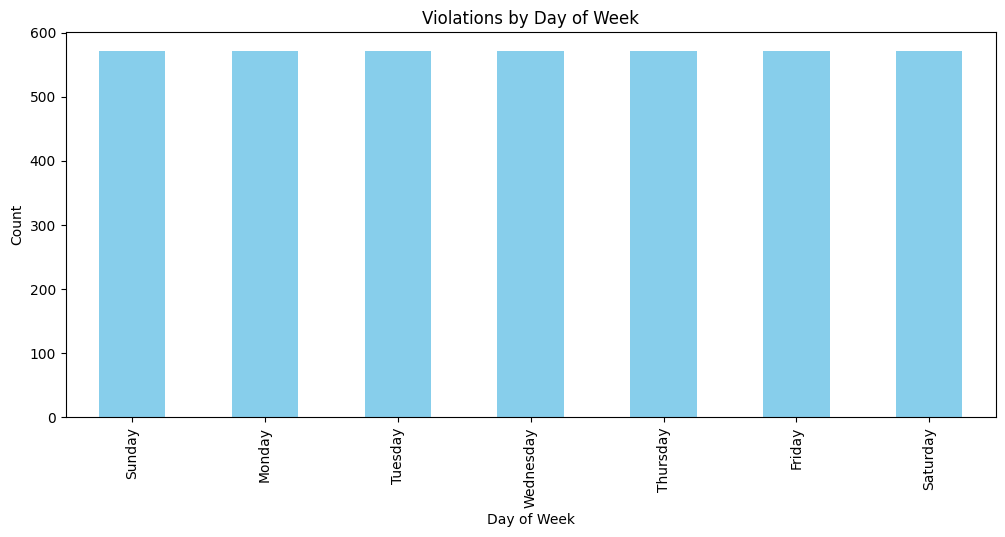

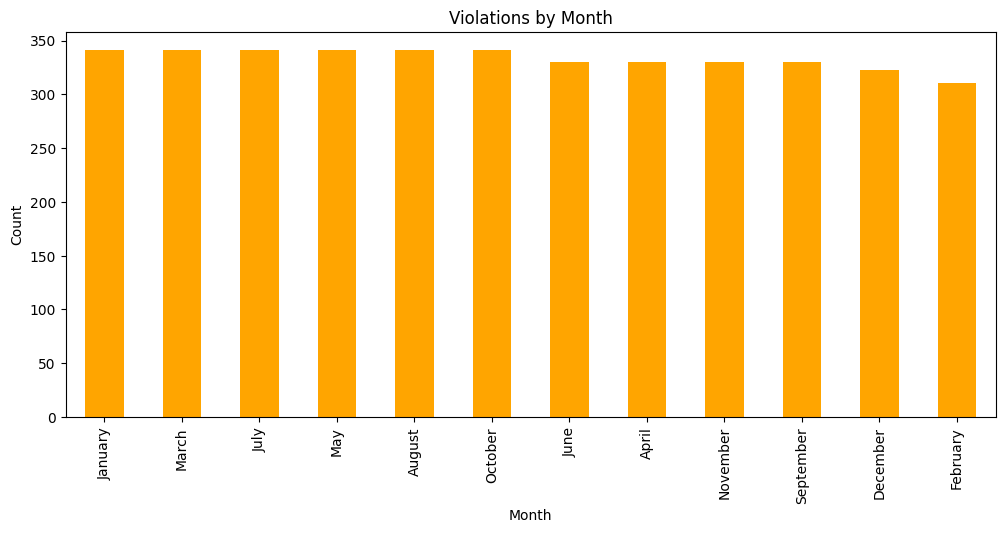

In [ ]:
# Total violations per day
plt.figure(figsize=(12,5))  #create a new blank chart area of size 10,5. it define width and height of the bar graph.
df['Day'].value_counts().plot(kind='bar', color='skyblue') #Takes the day column from the dataframe(df).Count how many times each day.
                                                           #Plots those counts as a bar chart.Each bar represents one day of the week.
                                                           #The height of each bar=number of violations that day.color skyblue makes bars visually appealing.
plt.title('Violations by Day of Week') #Add a title to the chart- helps understand what the visualization represents.
plt.xlabel('Day of Week')   #Day of week like Mon-sun.
plt.ylabel('Count')         #count number of violations.
plt.show()                  #display the final char.

# Violations by Month
plt.figure(figsize=(12,5))
df['Month'].value_counts().plot(kind='bar', color='orange')
plt.title('Violations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##Step 6 — Violation Type Analysis

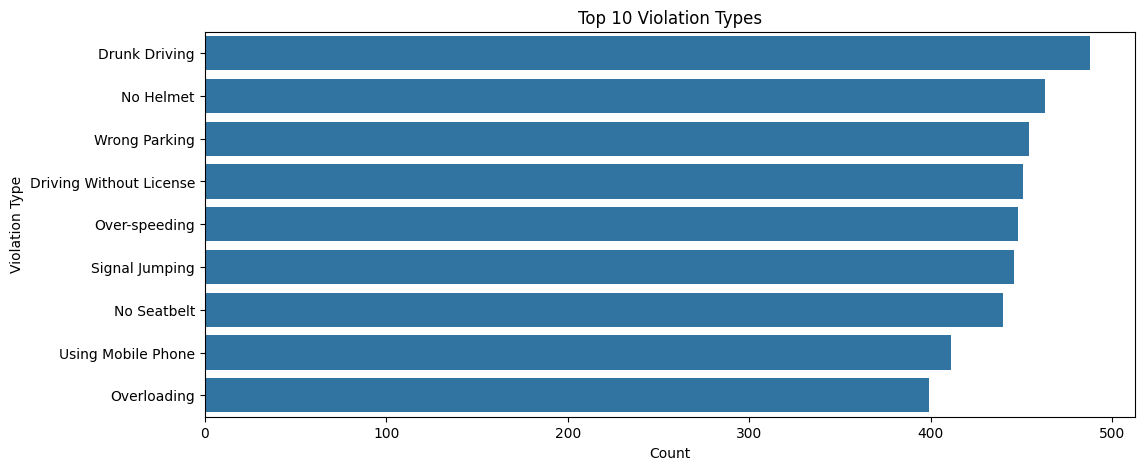

In [ ]:
#check if column exists.
#df.columns: lists all the columns names in your dataframe.
if 'Violation_Type' in df.columns:  #Return ture if this columns is present.
    plt.figure(figsize=(12,5))
    sns.countplot(y='Violation_Type', data=df, order=df['Violation_Type'].value_counts().index[:10])  #countplot() automaticallycounts the number of occurrances of each category.
                                                                                                      #plot violation types on the y axis. each horizontal bar represents one type of traffic violations.
                                                                                                      #data=df using that our data is coming from the dataframe name df.
                                                                                                      #order=df['Violation_Type'].value_counts() Using because counts how many times each type appears.
                                                                                                      #.index[:10] using select the top 10 most common type.sorted by frequency.
    plt.title('Top 10 Violation Types')
    plt.xlabel('Count') #showing the number of violations in x-axis.
    plt.ylabel('Violation Type')#showing the violation type categories in y-axis.
    plt.show() # display the final visualizations.

##Step 7 — Time-based Violation Pattern Detection

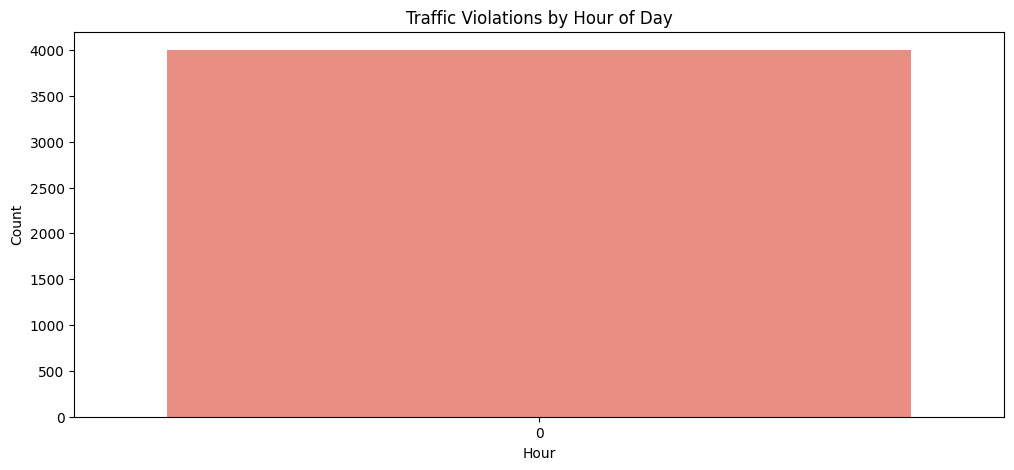

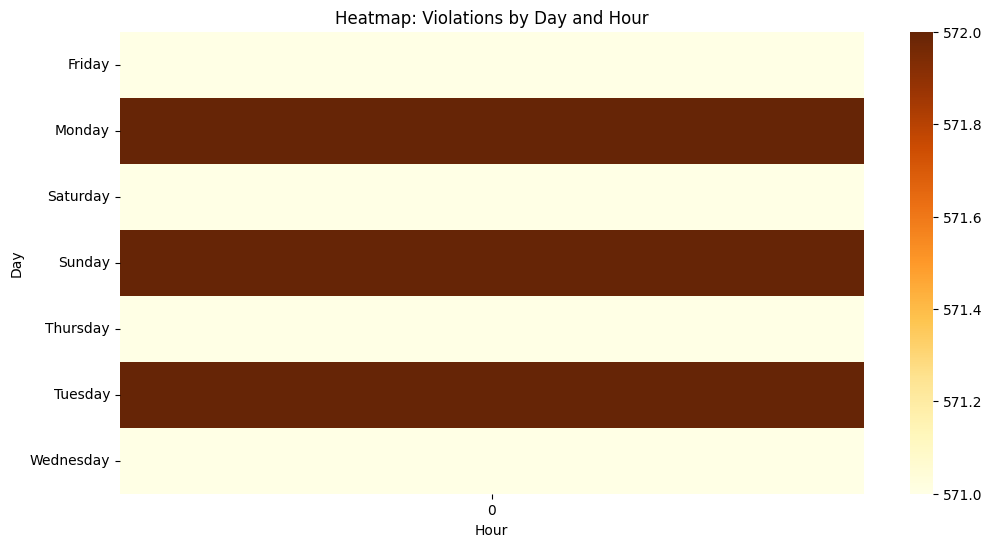

In [ ]:

# Violation trends by hour of day
if 'Hour' in df.columns:
    plt.figure(figsize=(12,5))
    sns.countplot(x='Hour', data=df, color='salmon')
    plt.title('Traffic Violations by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.show()


# Heatmap: Violations by Day vs Hour
if 'Day' in df.columns and 'Hour' in df.columns:
    pivot = df.pivot_table(index='Day', columns='Hour', aggfunc='size', fill_value=0)
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap='YlOrBr')
    plt.title('Heatmap: Violations by Day and Hour')
    plt.show()

##Step 8 — Hotspot Detection (Top Locations)

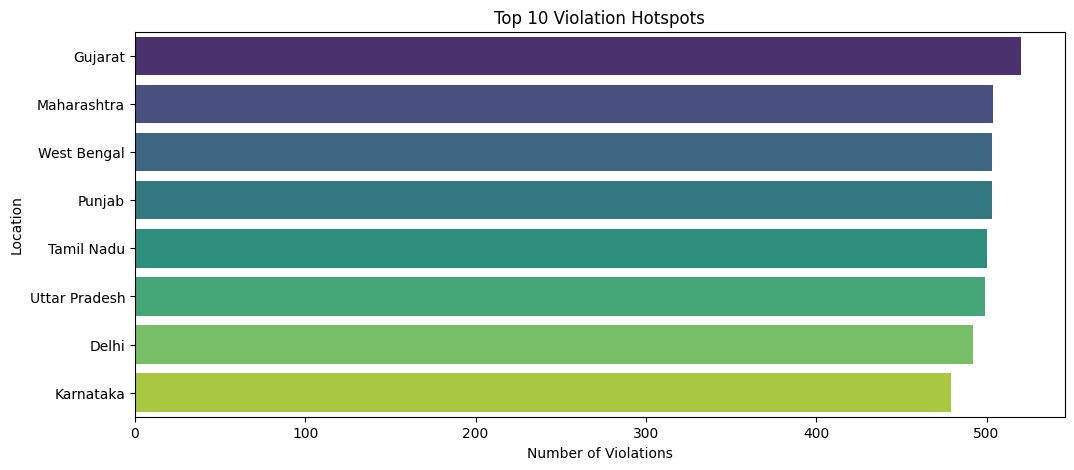

In [ ]:
if 'Location' in df.columns:
    top_locations = df['Location'].value_counts().head(10)
    plt.figure(figsize=(12,5))
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
    plt.title('Top 10 Violation Hotspots')
    plt.xlabel('Number of Violations')
    plt.ylabel('Location')
    plt.show()

##Step 9 — Summary Insights

In [ ]:
print("Total Violations Recorded:", len(df))
if 'Violation_Type' in df.columns:
    print("Most Common Violation Type:", df['Violation_Type'].mode()[0])
if 'Location' in df.columns:
    print("Top Hotspot Location:", df['Location'].mode()[0])
if 'Day' in df.columns:
    print("Day with Most Violations:", df['Day'].mode()[0])

Total Violations Recorded: 4000
Most Common Violation Type: Drunk Driving
Top Hotspot Location: Gujarat
Day with Most Violations: Monday


##Step 10 — Conclusion

This project highlights the transformative power of data science in uncovering meaningful insights from Smart Traffic violation pattern detector data. By leveraging visualization and analytical tools, we transformed raw information into actionable intelligence for safer and smarter traffic management.

Key Takeaways:

Temporal analysis (by weekday and hour) unveils distinct behavioral patterns among drivers.

Geospatial visualization pinpoints high-risk zones, helping prioritize enforcement efforts.

The insights generated can guide policymakers and authorities to design more effective road safety strategies and awareness initiatives.

Next Steps:

Incorporate predictive modeling to forecast potential violation spikes.

Integrate external datasets such as weather, holidays, and events for deeper contextual insights.

Deploy interactive dashboards using Streamlit for real-time monitoring and decision-making.